In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", category = FutureWarning)

In [2]:
import os
os.chdir(r"C:\Users\arunh\Documents\Python_Project_Data\Health care project")

# Problem statement:
Cardiovascular diseases are the leading cause of death globally. 
It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. 
The data below has the information about the factors that might have an impact on cardiovascular health. 


In [3]:
# Reading data set and creating and storing as a data frame using pandas
cardio = pd.read_excel("1645792390_cep1_dataset.xlsx")
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
cardio.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


 # 1 , Preliminary analysis:
a.	Perform preliminary data inspection and report the findings on the structure of the data,
    missing values, duplicates, etc.
    
b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy


In [5]:
# Checking the dataset 
print(cardio.info())
print()
print(f"The data stats of this data is '\n {cardio.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

The data stats of this data is '
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337

In [6]:
# Checking null values if any
null = cardio.isnull().sum()
null

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Shape of the data
print("The shape of the dataset is" ,cardio.shape )

The shape of the dataset is (303, 14)


In [8]:
# No null  values are found in this data set.
### let us check if there are any duplicates in the data set
duplicate = cardio[cardio.duplicated()]

print("Number of duplicate rows:", len(duplicate))
print()
print("Duplicate row is below")
display(duplicate)

Number of duplicate rows: 1

Duplicate row is below


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
cardio[160:166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [10]:
# Dropping the duplicate row from the data set
cardio.drop(duplicate.index, axis = 0 , inplace = True)

In [11]:
cardio[160:166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


In [12]:
# Rechecking the Shape of the data
print("The shape of the dataset is" ,cardio.shape )

The shape of the dataset is (302, 14)


# 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

a, Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [13]:
cardio.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
# Mean of all numerical columns
print("Mean:")
print(cardio.mean())

# Median of all numerical columns
print("\nMedian:")
print(cardio.median())

# Standard deviation of all numerical columns
print("\nStandard Deviation:")
print(cardio.std())

# Minimum value of all numerical columns
print("\nMinimum:")
print(cardio.min())

# Maximum value of all numerical columns
print("\nMaximum:")
print(cardio.max())


Mean:
age          54.420530
sex           0.682119
cp            0.963576
trestbps    131.602649
chol        246.500000
fbs           0.149007
restecg       0.526490
thalach     149.569536
exang         0.327815
oldpeak       1.043046
slope         1.397351
ca            0.718543
thal          2.314570
target        0.543046
dtype: float64

Median:
age          55.5
sex           1.0
cp            1.0
trestbps    130.0
chol        240.5
fbs           0.0
restecg       1.0
thalach     152.5
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

Standard Deviation:
age          9.047970
sex          0.466426
cp           1.032044
trestbps    17.563394
chol        51.753489
fbs          0.356686
restecg      0.526027
thalach     22.903527
exang        0.470196
oldpeak      1.161452
slope        0.616274
ca           1.006748
thal         0.613026
target       0.498970
dtype: float64

Minimum:
age          29.0
sex      

In [15]:
std = cardio.std()
var = std**2
print("The variance is\n",var)

The variance is
 age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64


# From this we have explored the measure of central tendancy like mean , median , standard deviation & also the variance.

In [16]:
print()

# 2b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [17]:
category_var = []
continious_var = []
for column in cardio.columns:
    if len(cardio[column].unique()) <=10:
        category_var.append(column)
    else:
        continious_var.append(column)
        
print("The categorical variables are ", category_var)
print("The continious  variables are ", continious_var)

The categorical variables are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
The continious  variables are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [18]:
cat_var = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

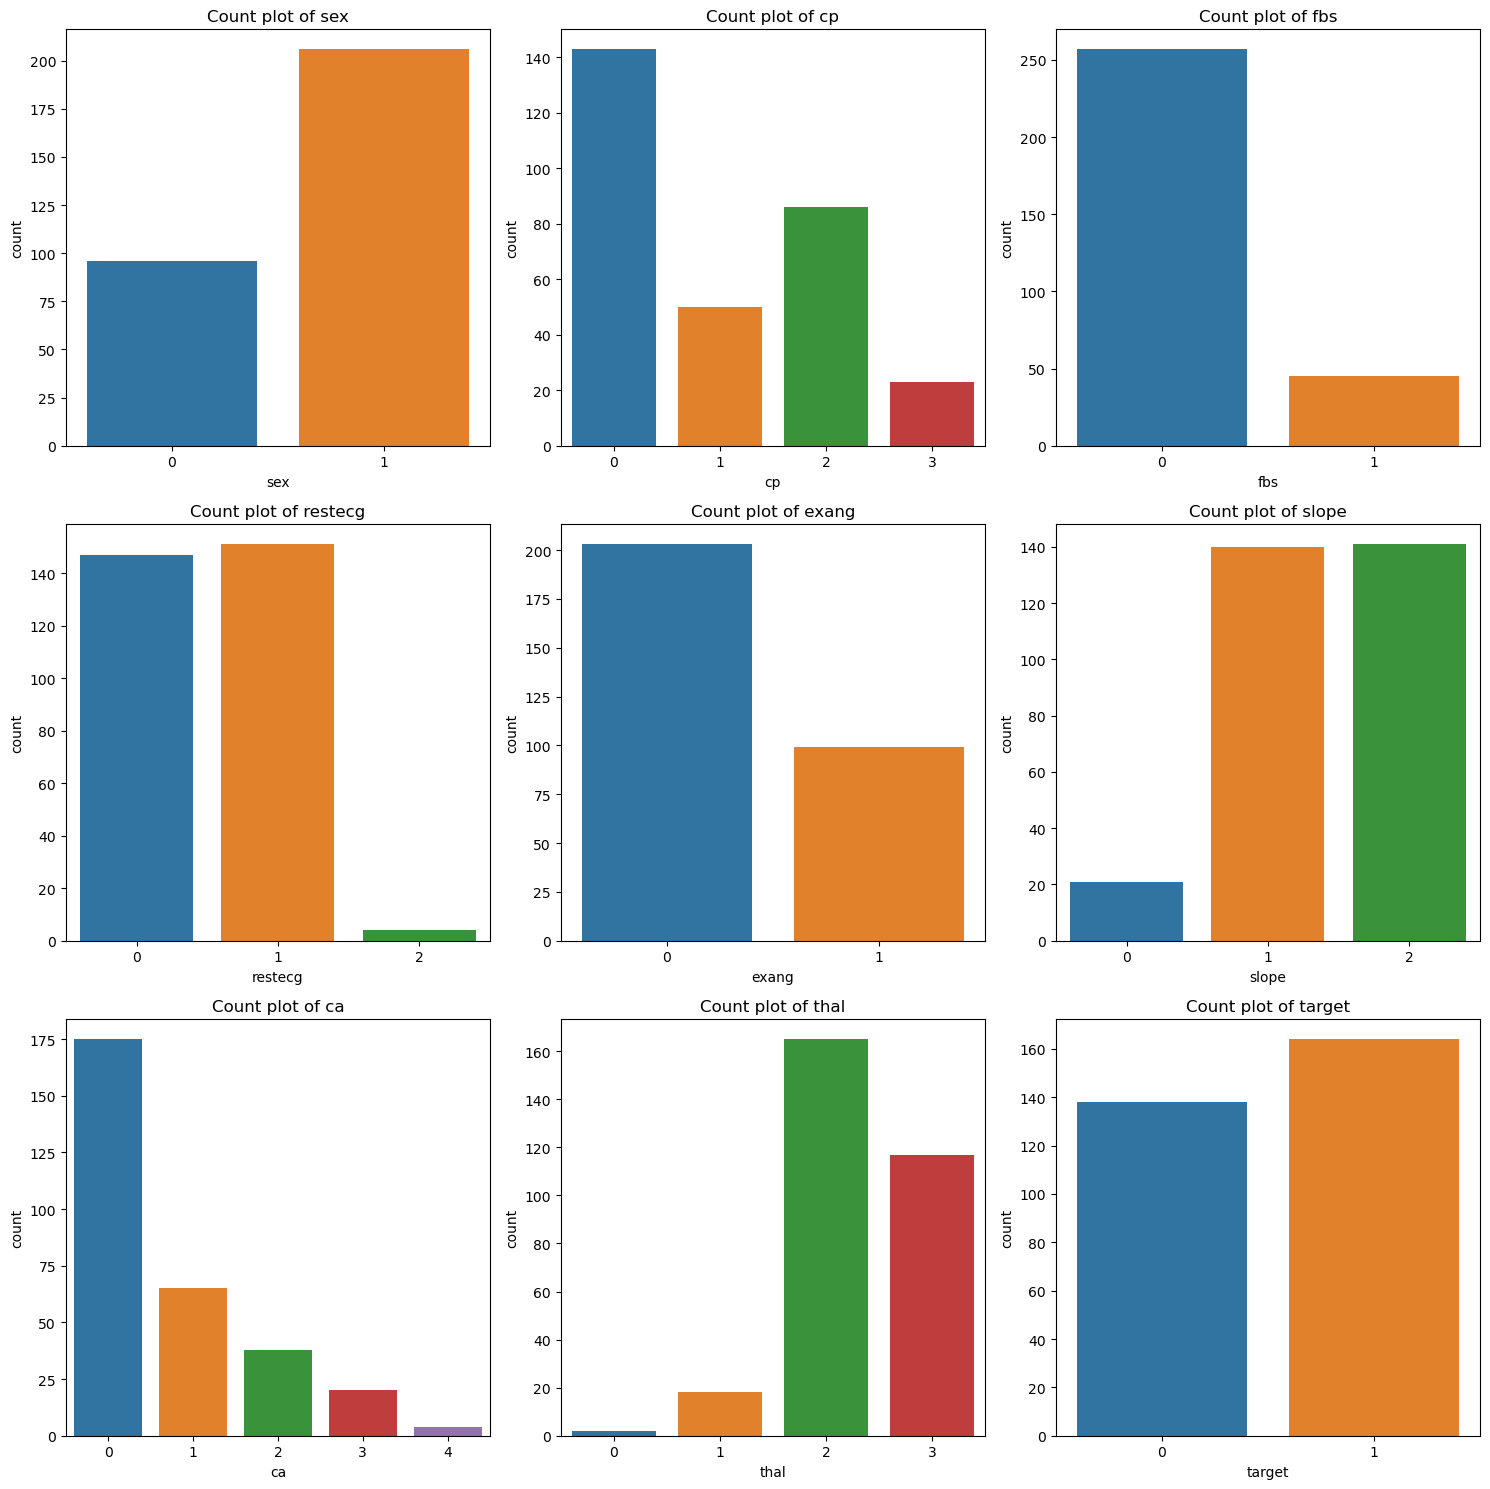

In [19]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))
for i, cat in enumerate(cat_var):
    row = i//3
    col = i%3
    sns.countplot(x=cat, data=cardio, ax=axs[row][col])
    axs[row][col].set_title("Count plot of " + cat)
plt.tight_layout()
plt.show()


# c.	Study the occurrence of CVD across the Age category

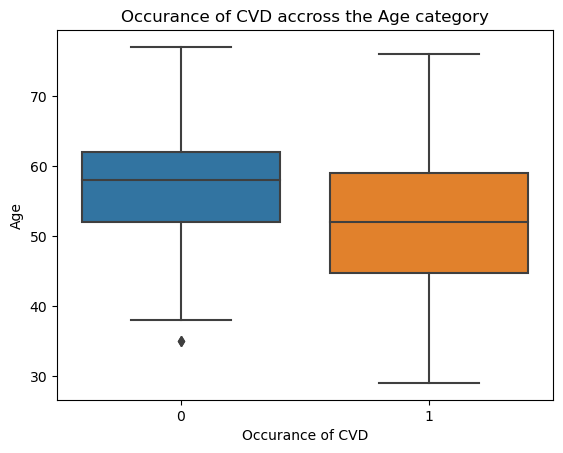

In [20]:
sns.boxplot(data=cardio, x = "target" , y="age" )
plt.xlabel("Occurance of CVD")
plt.ylabel("Age")
plt.title("Occurance of CVD accross the Age category")
plt.show()

# d.	Study the composition of all patients with respect to the Sex category

In [21]:
#Creating contingency table to compare sex with target
cardio_sex = pd.crosstab(cardio.target, cardio.sex)
cardio_sex

sex,0,1
target,,
0,24,114
1,72,92


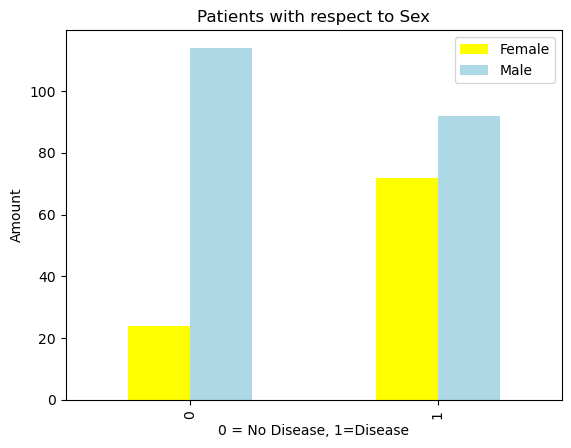

In [22]:
cardio_sex.plot(kind="bar", color=["yellow","lightblue"])
plt.title("Patients with respect to Sex")
plt.legend(["Female","Male"])
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.show()

# e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [23]:
# trestbps = Resting blood pressure (in mm Hg on admission to the hospital)
cardio["trestbps"]

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 302, dtype: int64

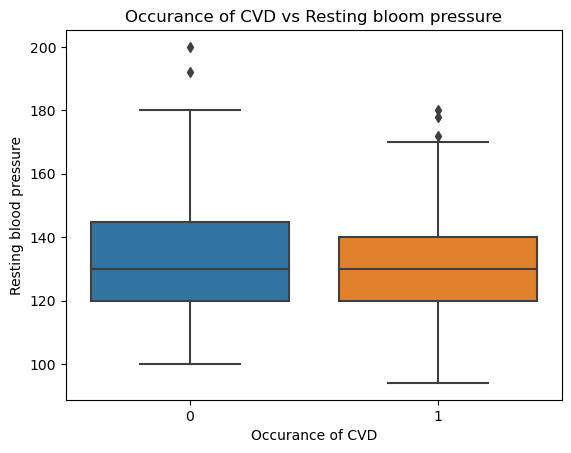

In [24]:
sns.boxplot(data=cardio, x = "target" , y="trestbps" )
plt.xlabel("Occurance of CVD")
plt.ylabel("Resting blood pressure")
plt.title("Occurance of CVD vs Resting bloom pressure")
plt.show()

In [25]:
from scipy.stats import ttest_ind

no_hd = cardio[cardio['target'] == 0]['trestbps']
hd = cardio[cardio['target'] == 1]['trestbps']

t_stat, p_val = ttest_ind(no_hd, hd)

print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 2.5609912831268065
p-value: 0.010926538861949147


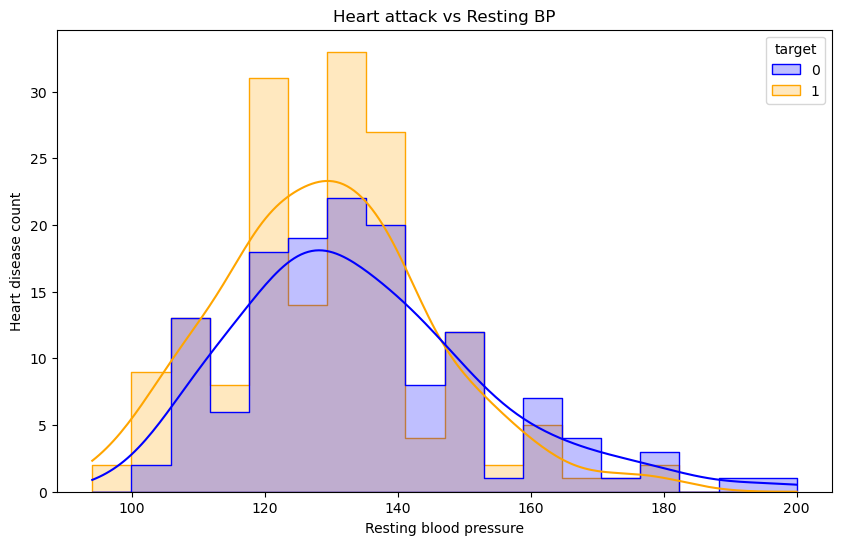

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data= cardio, x="trestbps", hue="target", element='step', kde=True, palette=["blue", "orange"])
plt.xlabel("Resting blood pressure")
plt.ylabel("Heart disease count")
plt.title("Heart attack vs Resting BP")
#plt.legend(["0= No-Heart Disease", "1= Heart Disease"])
#plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

# From these analysis we can understand that there is a significant connection.
# Anomalies in resting blood pressure can detect Heart attack

In [27]:
print()

# f.	Describe the relationship between cholesterol levels and a target variable

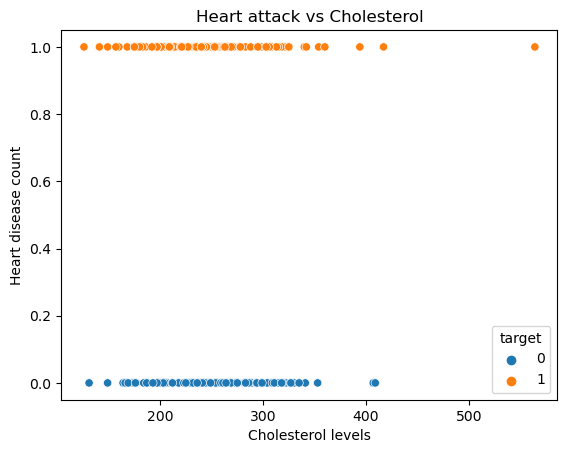

In [28]:
sns.scatterplot(data=cardio , x="chol" , y="target", hue = "target")
plt.xlabel("Cholesterol levels")
plt.ylabel("Heart disease count")
plt.title("Heart attack vs Cholesterol")
plt.show()

In [75]:

# Doing a t-test to find out if there is any statistical similarity
from scipy.stats import ttest_ind

no_chol = cardio[cardio['target'] == 0]['chol']
with_chol = cardio[cardio['target'] == 1]['chol']

t_stat, p_val = ttest_ind(no_chol, with_chol)

print('t-statistic:', t_stat)
print('p-value:', p_val)
# There is not much statistical similarity

t-statistic: 1.4152344258787561
p-value: 0.15803697464249714


In [30]:
# Creating a corelation matrix 
corr_matrix = cardio.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


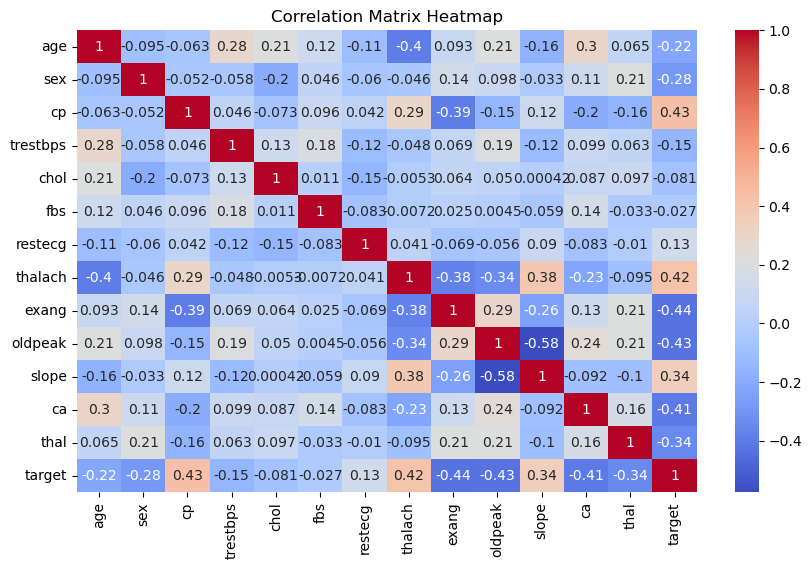

In [31]:
# Creating a heat map
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Chlorestral level has not much positive corelation with Heart Attack

# g.	State what relationship exists between peak exercising and the occurrence of a heart attack

In [32]:
cardio["slope"].unique()

array([0, 2, 1], dtype=int64)

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency

# create a contingency table of slope and target
contingency_table = pd.crosstab(cardio["slope"], cardio["target"])

# conduct the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print the results
print("Chi-Square Test Results:")
print("Chi-Square Value = ", chi2)
print("P-Value = ", format(p_value, '.10f'))


Chi-Square Test Results:
Chi-Square Value =  46.889476601618135
P-Value =  0.0000000001


In [34]:
contingency_table

target,0,1
slope,,
0,12,9
1,91,49
2,35,106


In [35]:
contingency_table1 = pd.crosstab(cardio["target"], cardio["slope"])

In [36]:
contingency_table1

slope,0,1,2
target,,,
0,12,91,35
1,9,49,106


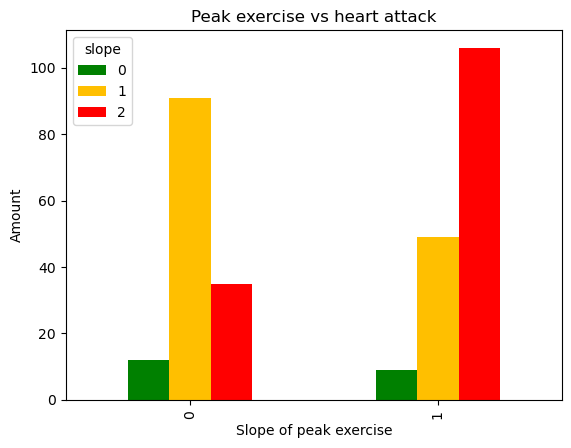

In [37]:
contingency_table1.plot(kind="bar", color=["Green",(1, 0.75, 0),"Red"])
plt.title("Peak exercise vs heart attack")
plt.xlabel("Slope of peak exercise")
plt.ylabel("Amount")
plt.show()

# Using the Corelation matrix , chi square test & the Bar plot , we can conclude that there is a considerable relationship between peak exercise & Heart attack

# h.	Check if thalassemia is a major cause of CVD

In [38]:
cardio["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

In [39]:
import pandas as pd
from scipy.stats import chi2_contingency

# create a contingency table of slope and target
contingency_table_thal = pd.crosstab(cardio["thal"], cardio["target"])

# conduct the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_thal)

# print the results
print("Chi-Square Test Results:")
print("Chi-Square Value = ", chi2)
print("P-Value = ", format(p_value, '.10f'))


Chi-Square Test Results:
Chi-Square Value =  84.61031794685029
P-Value =  0.0000000000


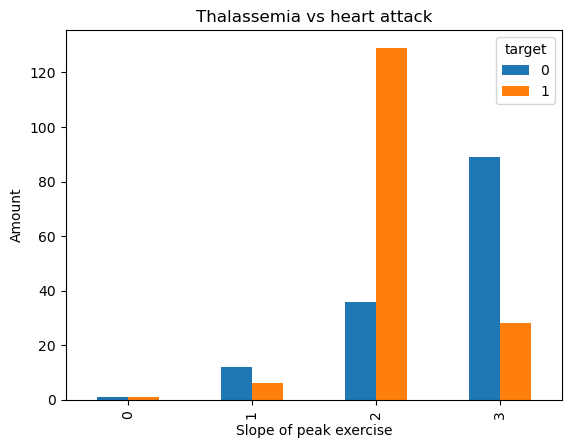

In [40]:
contingency_table_thal.plot(kind="bar")
plt.title("Thalassemia vs heart attack")
plt.xlabel("Slope of peak exercise")
plt.ylabel("Amount")
plt.show()

# With the chi square test result p value & the bar plot we can able to infer that Thalasemmia can be the one major cause of cvd

# i.	List how the other factors determine the occurrence of CVD

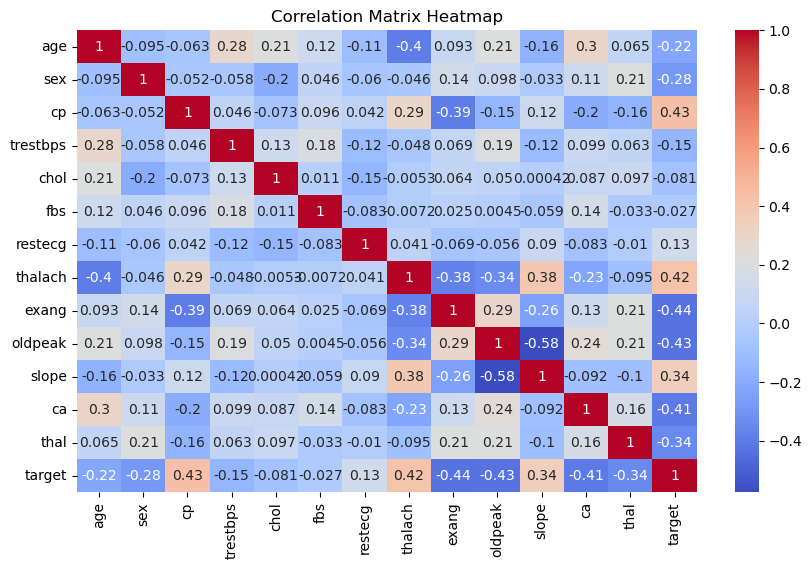

In [41]:
# Creating a heat map
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# The heat map with a co relation matrix can help to understand the relation betweek all the factors leading to CVD

# j.	Use a pair plot to understand the relationship between all the given variables

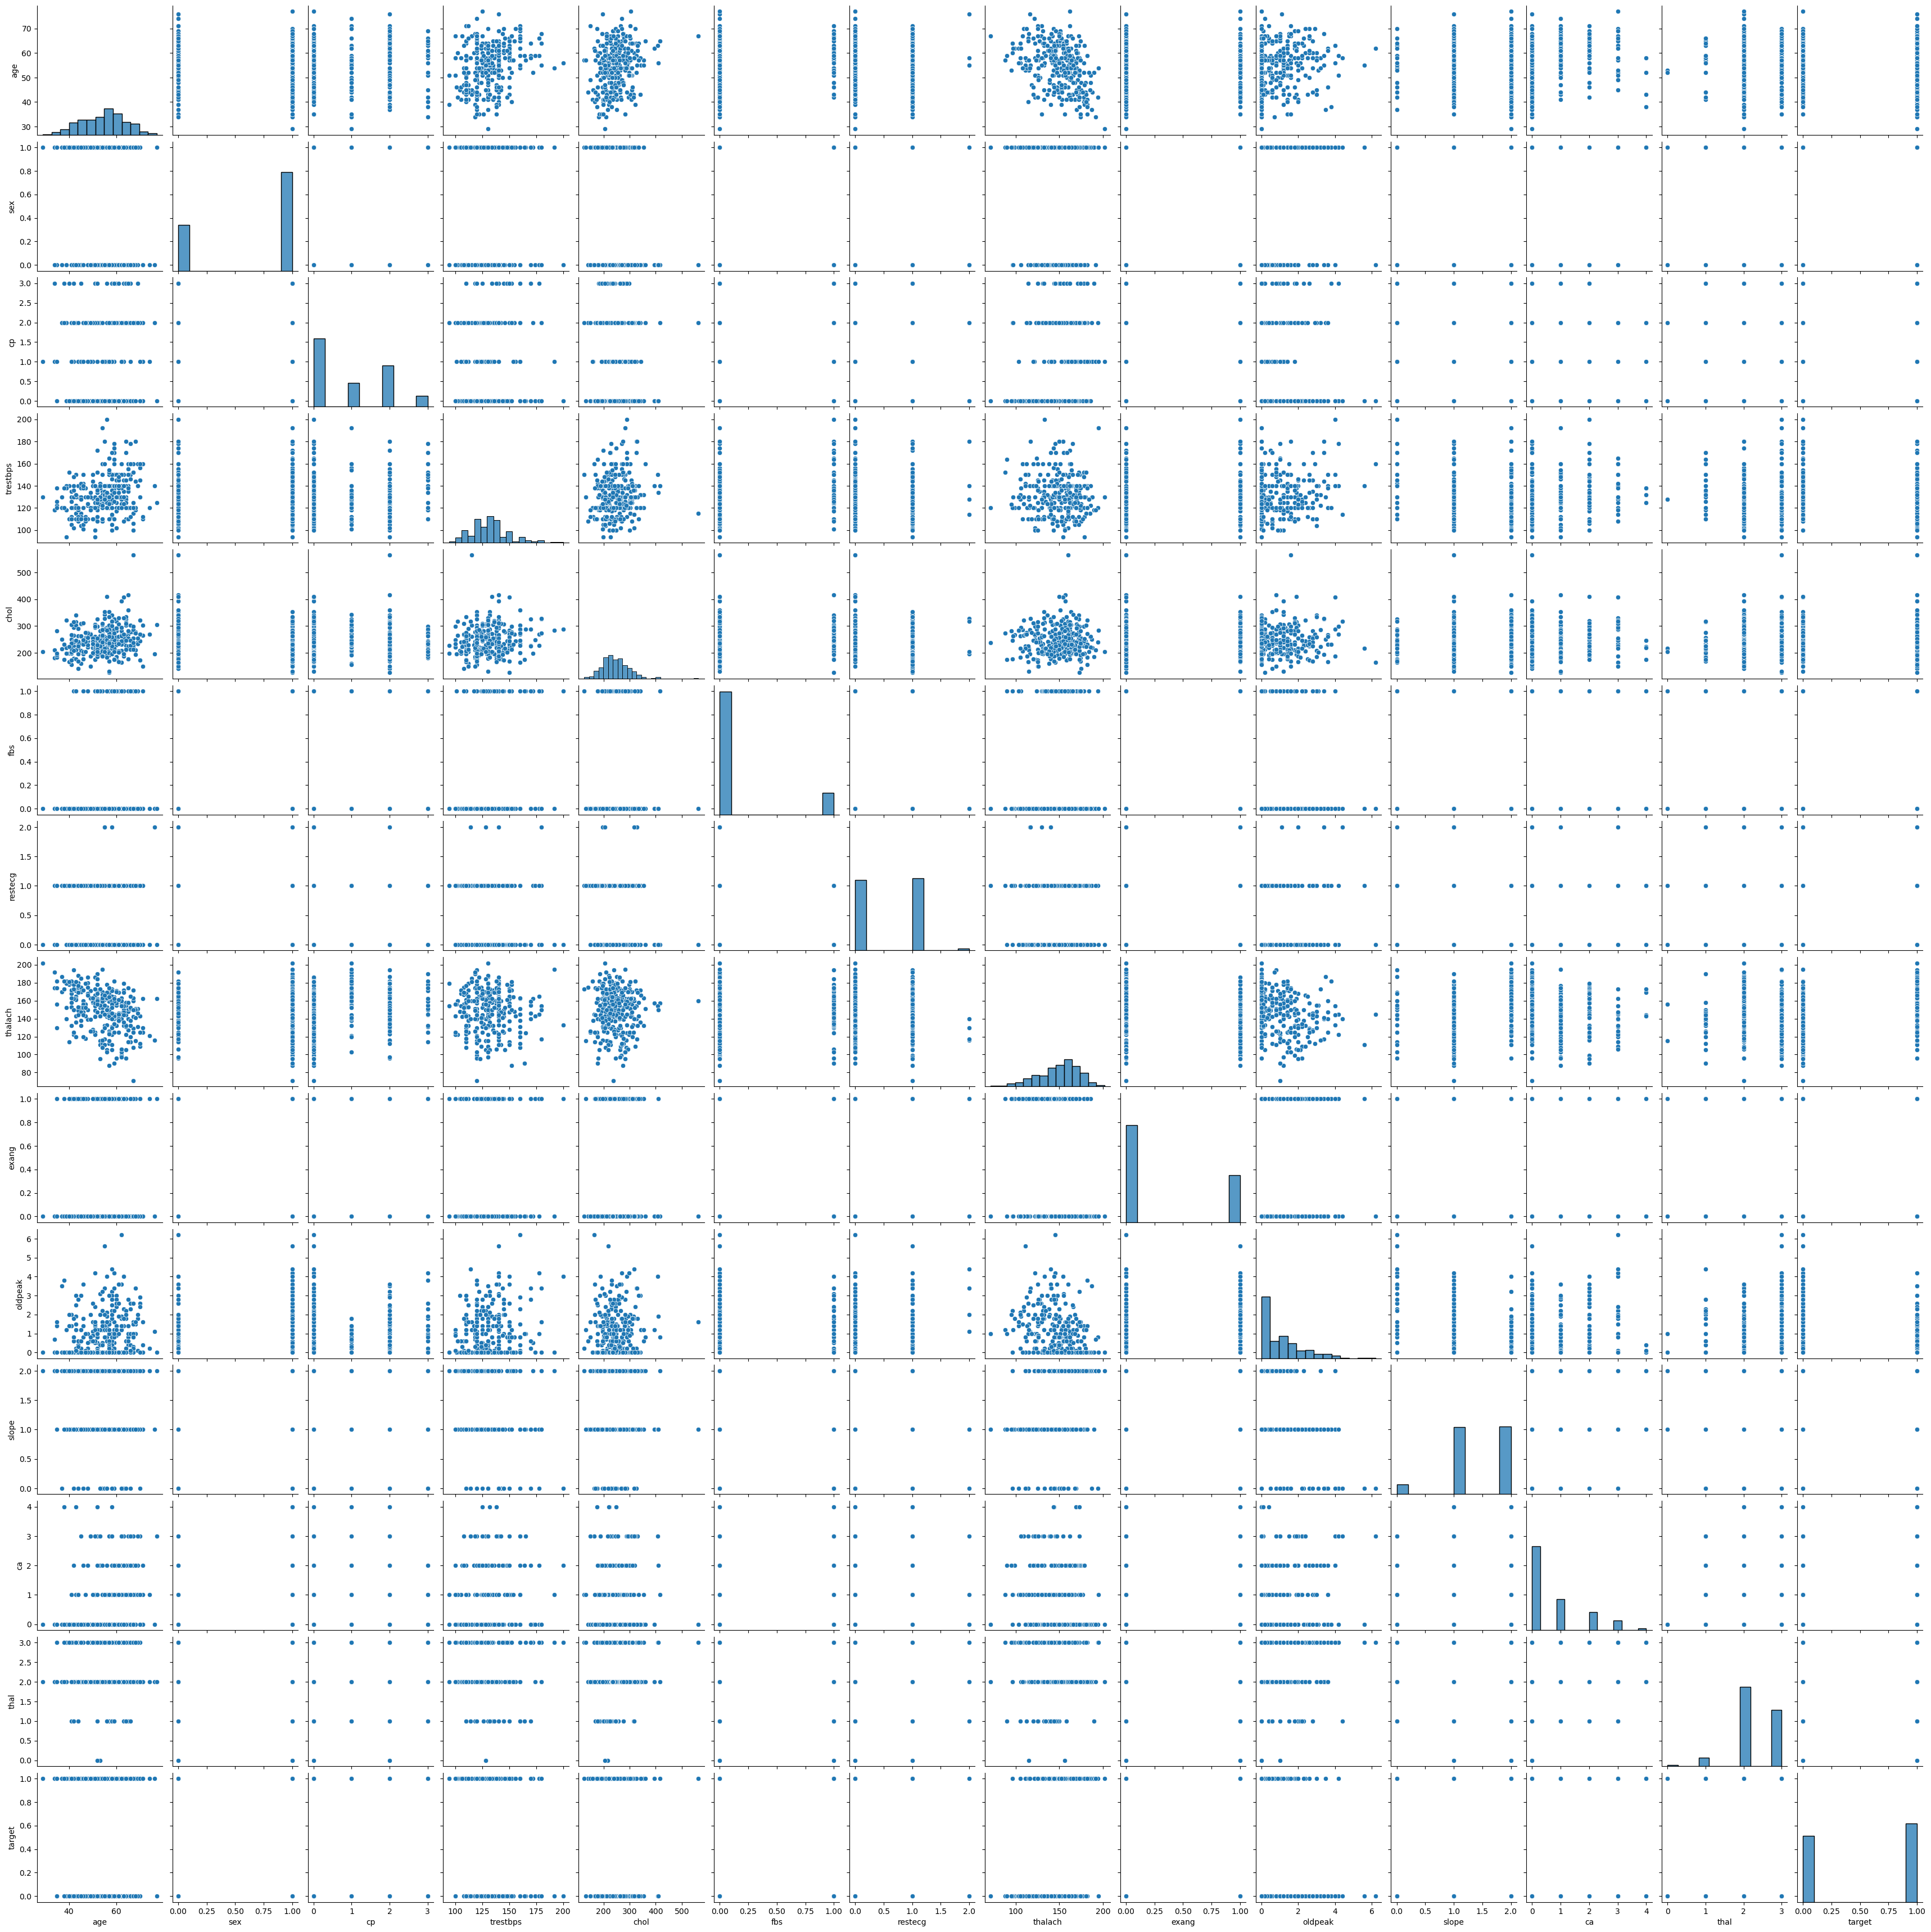

In [42]:
sns.pairplot(data=cardio)

## 3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [43]:
# lets do some data pre processing
category_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [44]:
continious_var

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [45]:
# we need to create dummies for the categorical variable
category_var.remove("target")
cardio_new = pd.get_dummies(cardio , columns=category_var)
cardio_new

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [46]:
# Since the continuious variable has many data which is measured in units , one data can dominate another one.
# we will do some feature scaling for the continious data

#standardizing the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

cardio_new[continious_var] = scale.fit_transform(cardio_new[continious_var])

In [47]:
cardio_new.head(5)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


1    164
0    138
Name: target, dtype: int64



<AxesSubplot: >

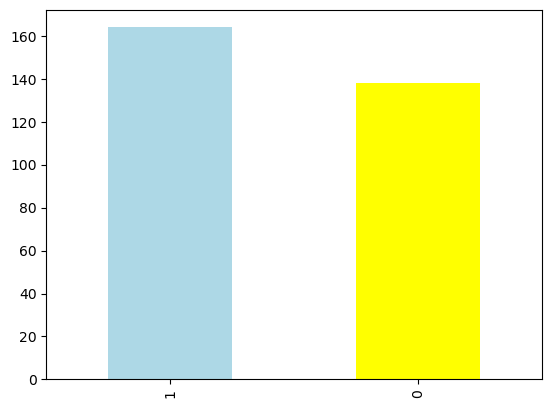

In [48]:
# check if the data is biased

print(cardio_new["target"].value_counts())
print()
cardio_new["target"].value_counts().plot(kind="bar", color=["lightblue","yellow"])

In [49]:
# The data set is not biased

<AxesSubplot: >

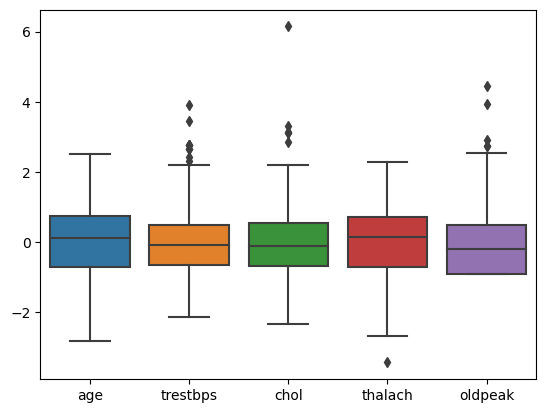

In [50]:
sns.boxplot(data= cardio_new[continious_var])

In [51]:
import matplotlib.pyplot as plt

# Get the list of continuous variables
continious_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


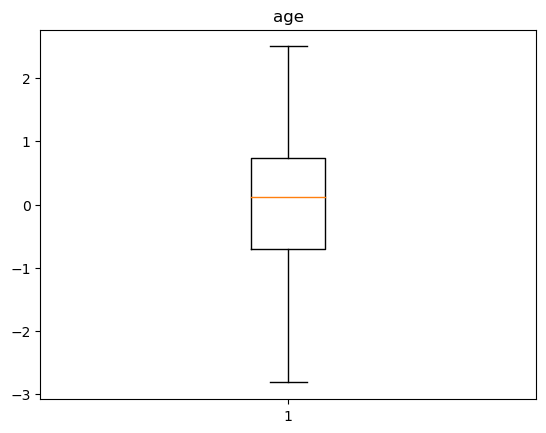

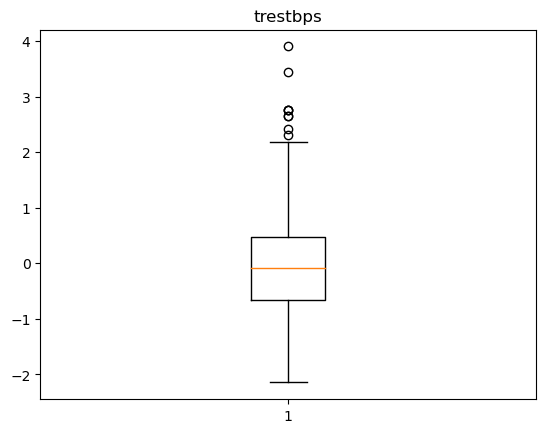

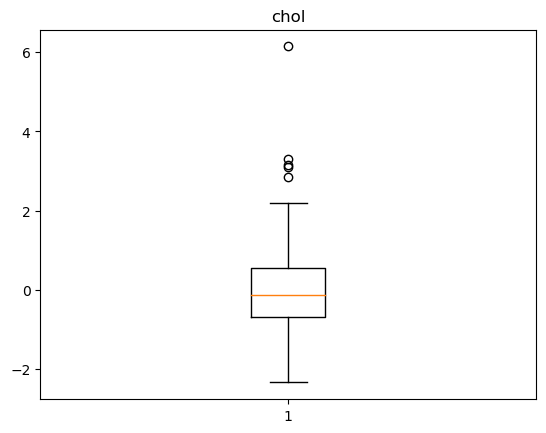

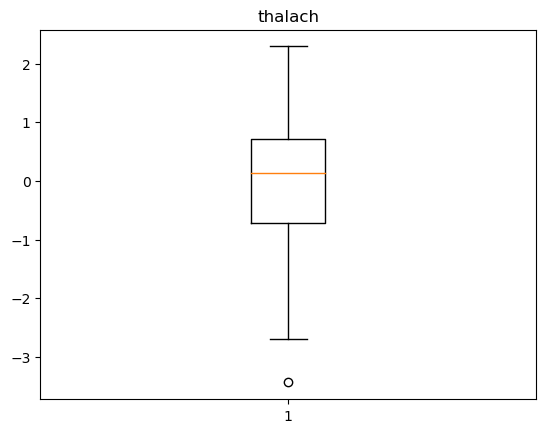

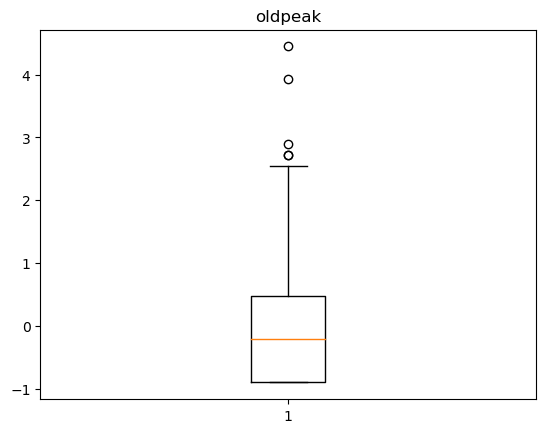

In [52]:
for i in continious_var:
    plt.figure()
    plt.boxplot(cardio_new[i])
    plt.title(i)

In [53]:
cardio["trestbps"].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [54]:
for out in continious_var:
        q1 = cardio_new[out].quantile(0.25)
        q3 = cardio_new[out].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr

        outliers = cardio_new[(cardio_new[out] < lower_bound) | (cardio_new[out] > upper_bound)]
        print(f"The feature '{out}' has the above outliers \n {display(outliers)}")



,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3


The feature 'age' has the above outliers 
 None


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
8,-0.267966,2.303906,-0.919336,0.543632,-0.468334,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
101,0.506972,2.646092,0.454829,-0.199843,2.722620,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
110,1.060500,2.760154,1.519323,0.193761,-0.899544,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
203,1.503322,2.760154,0.532247,0.018826,0.480328,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
223,0.174856,3.900776,0.803209,-0.724650,2.550136,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
241,0.506972,2.417968,0.048386,-0.287311,-0.899544,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
248,-0.046555,3.444528,0.706437,1.986850,-0.899544,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
260,1.281911,2.646092,-0.358057,0.674834,-0.037124,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
266,0.064151,2.760154,1.558032,-1.424392,2.032684,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


The feature 'trestbps' has the above outliers 
 None


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
28,1.171205,0.478910,3.299932,0.324963,-0.209608,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
85,1.392616,-0.946867,6.145034,0.456164,0.480328,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
96,0.839089,0.478910,2.854780,0.324963,0.135360,1,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
220,0.949794,1.049221,3.106387,0.193761,2.550136,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
246,0.174856,0.136724,3.145096,0.018826,0.739054,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


The feature 'chol' has the above outliers 
 None


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
272,1.392616,-0.661712,-0.183867,-3.436149,-0.037124,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


The feature 'thalach' has the above outliers 
 None


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
101,0.506972,2.646092,0.454829,-0.199843,2.722620,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
204,0.839089,1.619532,-1.596741,-0.199843,4.447460,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
221,0.064151,0.478910,-0.570956,-1.686795,3.930008,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
250,-0.378671,0.478910,0.996754,-1.205722,2.722620,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
291,0.396267,-1.003898,1.383842,-0.418513,2.895104,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0


The feature 'oldpeak' has the above outliers 
 None


In [55]:
# Right now we wont remove the outliers in data considering these points are relevant for our model

In [56]:
# Build a Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr = LogisticRegression()
X = cardio_new.drop('target', axis = 1)
y = cardio_new["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25 , random_state=77)

In [57]:
lr.fit(X_train, y_train).score(X_train,y_train)


0.8849557522123894

In [58]:
Logistic_CVD_prediction = lr.predict(X_test)

In [59]:
# Create a confuion matrix
from sklearn import metrics
confuison_log_matrix = metrics.confusion_matrix(y_test, Logistic_CVD_prediction)
print(confuison_log_matrix)

[[27  7]
 [ 3 39]]


In [60]:
# Check the accuracy of the model
accuracy_logistic_model = metrics.accuracy_score(y_test, Logistic_CVD_prediction)
print("The accuracy score of Logistic Regression model is :", round(accuracy_logistic_model,3)*100,"%")

The accuracy score of Logistic Regression model is : 86.8 %


# Lets build a random forest model

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion="gini", max_depth=8 , n_estimators = 200, random_state=33)
RF.fit(X_train,y_train)
Random_Forest_cardio_predict = RF.predict(X_test)

In [62]:
confuison_RF_matrix = metrics.confusion_matrix(y_test, Random_Forest_cardio_predict)
print(confuison_RF_matrix)
accuracy_RF_model = metrics.accuracy_score(y_test, Random_Forest_cardio_predict)
print("The accuracy score of Random forest model is :", round(accuracy_RF_model,3)*100,"%")

[[26  8]
 [ 3 39]]
The accuracy score of Random forest model is : 85.5 %


In [63]:
Logistic_CVD_prediction

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [64]:
Random_Forest_cardio_predict

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [65]:
# Exploring the result for both the models
from sklearn.metrics import classification_report
print("The classification report for LR model is \n", classification_report(y_test,Logistic_CVD_prediction))
print("***********************************************************************")
print("The classifiation report for RF model is \n", classification_report(y_test,Random_Forest_cardio_predict))

The classification report for LR model is 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84        34
           1       0.85      0.93      0.89        42

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76

***********************************************************************
The classifiation report for RF model is 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.83      0.93      0.88        42

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [66]:
# Using pearson correlation coefficient method
corr_matrix_new = X.corrwith(y)
# sorting the variables which has highes corelation
corr_matrix_new.sort_values(ascending= False)

thal_2       0.526030
ca_0         0.470849
exang_0      0.435601
thalach      0.419955
slope_2      0.392121
cp_2         0.313696
sex_0        0.283609
cp_1         0.247649
restecg_1    0.172827
cp_3         0.087959
ca_4         0.048133
fbs_0        0.026826
thal_0      -0.007056
fbs_1       -0.026826
slope_0     -0.062822
restecg_2   -0.068156
chol        -0.081437
thal_1      -0.105986
trestbps    -0.146269
restecg_0   -0.157299
ca_3        -0.210126
age         -0.221476
ca_1        -0.231255
ca_2        -0.273295
sex_1       -0.283609
slope_1     -0.360258
oldpeak     -0.429146
exang_1     -0.435601
thal_3      -0.484887
cp_0        -0.514626
dtype: float64

In [67]:
type(corr_matrix_new)

pandas.core.series.Series

In [68]:
# Another method to create corelation matrix
#corr_matrix_new1 = X.corr()
#corr_matrix_new1

# Building random forest model again & checking accuracy.
# not required for this project
RF = RandomForestClassifier(criterion="gini",max_depth=8,n_estimators = 200, random_state=33)
RF.fit(X_train_new,y_train_new)
Random_Forest_cardio_predict_new = RF.predict(X_test_new)
confuison_RF_matrix_new = metrics.confusion_matrix(y_test_new, Random_Forest_cardio_predict_new)
print(confuison_RF_matrix_new)
accuracy_RF_model_new = metrics.accuracy_score(y_test_new, Random_Forest_cardio_predict_new)
print("The accuracy score of Random forest model after feature selection is :", accuracy_RF_model_new)

In [69]:
# Logistic regression stats model
import statsmodels.api as sm

# build a logistic regression model
logit_model = sm.Logit(y_train, X_train)

# fit the model
result = logit_model.fit(maxiter=90000)

# print summary of the model
print(result.summary())

# extract p-values and standard errors
p_values = result.pvalues
std_errors = result.bse

# create a list of features with significant p-values
significant_features = []
for i in range(len(p_values)):
    if p_values[i] < 0.05:
        significant_features.append(X_train.columns[i])
        
# select only the significant features
X_train_selected = X_train[significant_features]
X_test_selected = X_test[significant_features]


Optimization terminated successfully.
         Current function value: 0.303189
         Iterations 52761
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  226
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                           22
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.5606
Time:                        22:37:17   Log-Likelihood:                -68.521
converged:                       True   LL-Null:                       -155.93
Covariance Type:            nonrobust   LLR p-value:                 8.813e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.3341      0.284      1.174      0.240      -0.223       0.892
trestbps      -0.6202    

# trestbps 
(Resting blood pressure (in mm Hg on admission to the hospital) is one of the most important feature

# We will create another Logistic regression model with only the positive corelated features & all the continious variables

In [70]:
# We will create a new features for X & y 
X_new = cardio_new[["thal_2","ca_0","exang_0","thalach","slope_2","cp_2","sex_0","cp_1","restecg_1","cp_3",
                   "ca_4","fbs_0",'age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y_new = cardio_new[["target"]]

In [71]:
# create a new train_test- split

X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y_new, test_size=.25, random_state=77)
lr.fit(X_train_new, y_train_new).score(X_train_new,y_train_new)


C:\Users\arunh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8672566371681416

In [72]:
Logistic_CVD_prediction_new = lr.predict(X_test_new)

In [73]:
# Create a confuion matrix after selecting the highest corelated variables
from sklearn import metrics
confuison_log_matrix_new = metrics.confusion_matrix(y_test_new, Logistic_CVD_prediction_new)
print(confuison_log_matrix_new)
accuracy_logistic_model_new = metrics.accuracy_score(y_test_new, Logistic_CVD_prediction_new)
print("The accuracy score of Logistic Regression model after feature selection is :", round(accuracy_logistic_model_new,3)*100, "%")

[[28  6]
 [ 2 40]]
The accuracy score of Logistic Regression model after feature selection is : 89.5 %


In [74]:
# Exploring the result of the new logistic Regression model
from sklearn.metrics import classification_report
print("The classification report for new LR model is \n", classification_report(y_test_new,Logistic_CVD_prediction_new))
print("***********************************************************************")
#print("The classifiation report for RF model is \n", classification_report(y_test_new,Random_Forest_cardio_predict_new))

The classification report for new LR model is 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        34
           1       0.87      0.95      0.91        42

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76

***********************************************************************
